In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `breast_cancer_dataset.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = 'Resources/breast_cancer_dataset.csv'
bc_df = pd.read_csv(file_path)

# Review the DataFrame
bc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Step 2: Create the labels set (`y`)  from the “diagnosis” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into (y) labels and features (x)

# Separate the y variable, the labels
y = bc_df['diagnosis']

# Separate the X variable, the features
X = bc_df.drop(columns=['diagnosis', 'id'])

In [4]:
# Review the y variable Series
y[:5]

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [5]:
# Review the X variable DataFrame
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [6]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [7]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

C:\Users\moralesm\AppData\Local\anaconda3\envs\dev_2\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [8]:
# Make a prediction using the testing data
training_predictions = lr_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [9]:
# Generate a confusion matrix for the model
training_matrix = confusion_matrix(y_test, training_predictions)
print(training_matrix)

[[84  4]
 [ 4 51]]


In [10]:
# Print the classification report for the model
training_report = classification_report(y_test, training_predictions)
print(training_report)

              precision    recall  f1-score   support

           B       0.95      0.95      0.95        88
           M       0.93      0.93      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



### How well does the logistic regression model predict both the `B` (benign) and `M` (malignant) labels?

**Overall, the model seems to perform very well, with high precision, recall, and F1-scores for both classes, and a solid accuracy:**

**Precision:** This measures the accuracy of the positive predictions. For class B, it's 0.95, meaning that when the model predicts class B, it is correct 95% of the time. For class M, it's 0.93.

**Recall:** This measures the model's ability to identify all relevant instances. For class B, it's 0.95, meaning that the model correctly identifies 95% of all actual instances of class B. For class M, it's 0.93.

**F1-score:** This is the harmonic mean of precision and recall, providing a single metric that balances both concerns. For both classes B and M, the F1-scores are 0.95 and 0.93, respectively.

**Support:** This indicates the number of actual occurrences of the class in the dataset. Class B has 88 instances, and class M has 55 instances.

**Accuracy:** This is the overall accuracy of the model across all classes. Here, it's 0.94, meaning that the model is correct 94% of the time overall.

**Macro average:** This calculates the average performance across classes, treating all classes equally. Both precision, recall, and F1-score are 0.94 here.

**Weighted average:** This takes into account the support for each class when calculating the averages. The weighted averages of precision, recall, and F1-score are all 0.94, reflecting a balanced performance relative to the class distributions.

### Compute the Correlation Matrix

---

In [11]:
corr_matrix = X.corr()
# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_

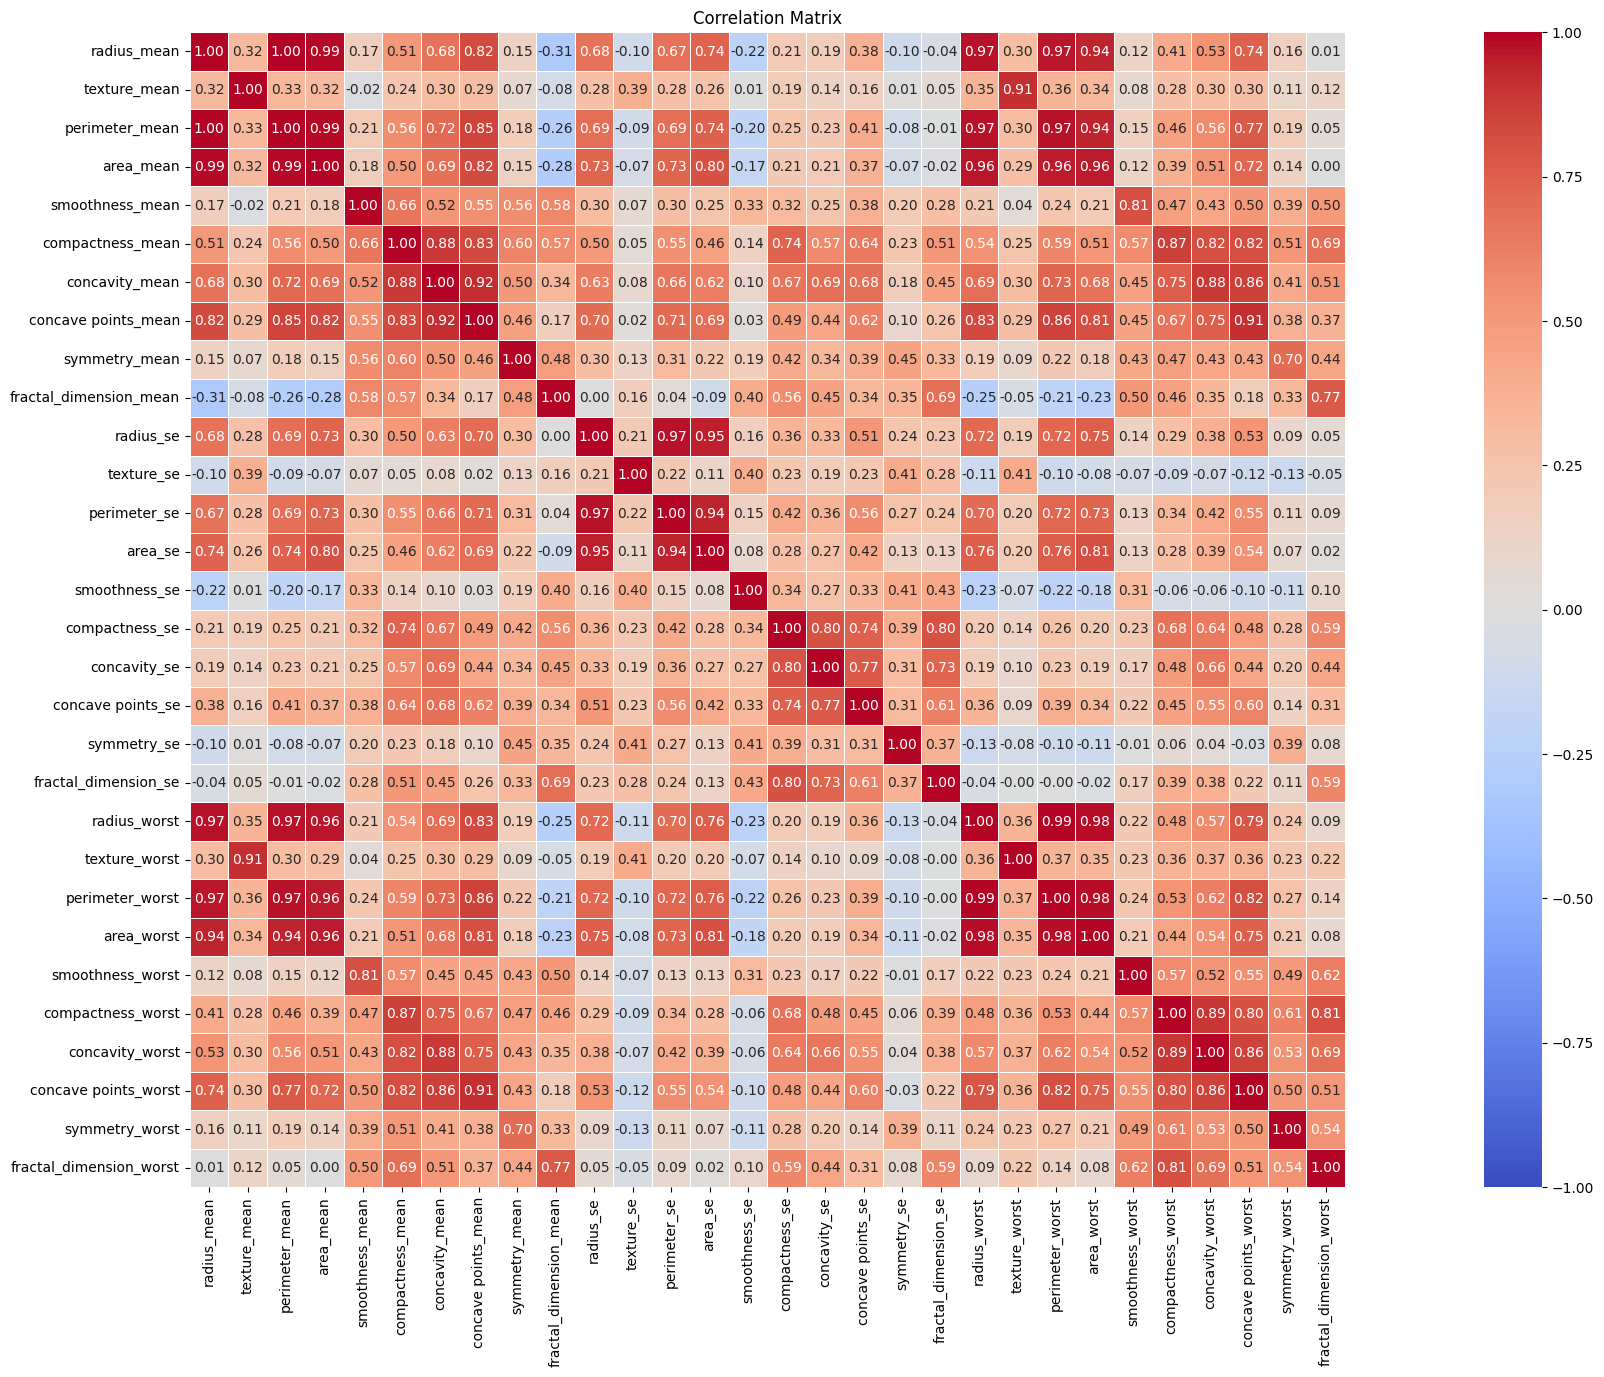

In [19]:
# Plot the correlation matrix
plt.figure(figsize=(36, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5, square=True)
plt.title('Correlation Matrix')
plt.show()